
# Train YOLOv8 Classification on Your Custom Dataset


## Steps

In this noteboook, we are going to cover:

- Before you start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Export Model
- Download Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Runtime` -> `Change Runtime Type`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu May  1 11:42:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8
There are two ways to install YOLOv8
- From the source (for development)
- Via pip (recommended)

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

To prepare the custom data for classification using YOLO v8, Ensure that your dataset is structured as described below: You should have separate folders for train, test, and val, each containing subfolders for each class (e.g., ClassA, ClassB). Place the corresponding images for each class within their respective subfolders.

### Dataset Structure
```
Dataset
│
└───train
│   └───ClassA
│       │   ClassA_1.jpg
│       │   ClassA_2.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_1.jpg
│       │   ClassB_2.jpg
│       │   ...
│   └───...
└───test
│   └───ClassA
│       │   ClassA_9090.jpg
│       │   ClassA_9895.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2343.jpg
│       │   ClassB_2312.jpg
│       │   ...
│   └───...
└───val
│   └───ClassA
│       │   ClassA_3070.jpg
│       │   ClassA_2845.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2903.jpg
│       │   ClassB_2232.jpg
│       │   ...
│   └───...
```


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMxnFNuMfwUb84PsiI4Y")
project = rf.workspace("north-south-university-9briv").project("skin-cancer-detection-wfldq")
version = project.version(4)
dataset = version.download("folder")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Cancer-Detection-4 in folder:: 100%|██████████| 16857/16857 [00:01<00:00, 10426.14it/s]


In [ ]:
#!mkdir '{HOME}/datasets'
#DATA_DIR='/content/datasets'

### Download the Characters Dataset
The dataset includes 9945 images. The characters are structure in the format as described above.

In [ ]:
#!gdown 1MOy04R3IWGdiIIadLQJTxPPkdNkQKAKW -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1MOy04R3IWGdiIIadLQJTxPPkdNkQKAKW
To: /content/dataset.zip
100% 10.1M/10.1M [00:00<00:00, 15.8MB/s]


You may use this notebook with your own dataset as well. To use this example with your own dataset, place your zip data file into the`/content` (HOME Directory of the Notebook) directory.

In [ ]:
#!unzip "dataset.zip" -d "datasets"

Streaming output truncated to the last 5000 lines.
  inflating: datasets/train/V/56387_png.rf.093a514fe2ea25b014e2973bd5155fbf.jpg  
  inflating: datasets/train/V/56495_png.rf.55cde26bff3fc1dfbad4ebe5346dcc18.jpg  
  inflating: datasets/train/V/56639_png.rf.87857d79a96db8c0d59738ff17ddac83.jpg  
  inflating: datasets/train/V/56747_png.rf.21e8f269fc45813d475df8c9bdb2aabc.jpg  
  inflating: datasets/train/V/57215_png.rf.063b9b7a9bc9a316ab889c56b09c0415.jpg  
  inflating: datasets/train/V/57863_png.rf.6869d352aff61c9881b60953270e21b0.jpg  
  inflating: datasets/train/V/57899_png.rf.1f8090dd774529a615678c18f81dec06.jpg  
  inflating: datasets/train/V/57971_png.rf.0ae07c075333068716f32789340bc5c3.jpg  
  inflating: datasets/train/V/58259_png.rf.27f68f00056a807a13180e0ea3d9126a.jpg  
  inflating: datasets/train/V/58511_png.rf.c7984d7c65c3c2c171ff99fcebacd158.jpg  
  inflating: datasets/train/V/58547_png.rf.8639888a352f64db409bd0ba41f17459.jpg  
  inflating: datasets/train/V/58691_png.rf.55eb

## Custom Training

In [ ]:
%cd {HOME}
DATA_DIR='/content/Skin-Cancer-Detection-4'
!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=50 imgsz=128

/content
Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/Skin-Cancer-Detection-4, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train2/weights/best.pt data='{DATA_DIR}'

/content
Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,771,623 parameters, 0 gradients, 41.6 GFLOPs
train: /content/Skin-Cancer-Detection-4/train... found 13862 images in 7 classes ✅ 
val: /content/Skin-Cancer-Detection-4/val... found 1978 images in 7 classes ✅ 
test: /content/Skin-Cancer-Detection-4/test... found 991 images in 7 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 310.5±122.5 MB/s, size: 4.9 KB)
val: Scanning /content/Skin-Cancer-Detection-4/val... 1978 images, 0 corrupt: 100% 1978/1978 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100% 124/124 [00:03<00:00, 40.15it/s]
                   all      0.795      0.992
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


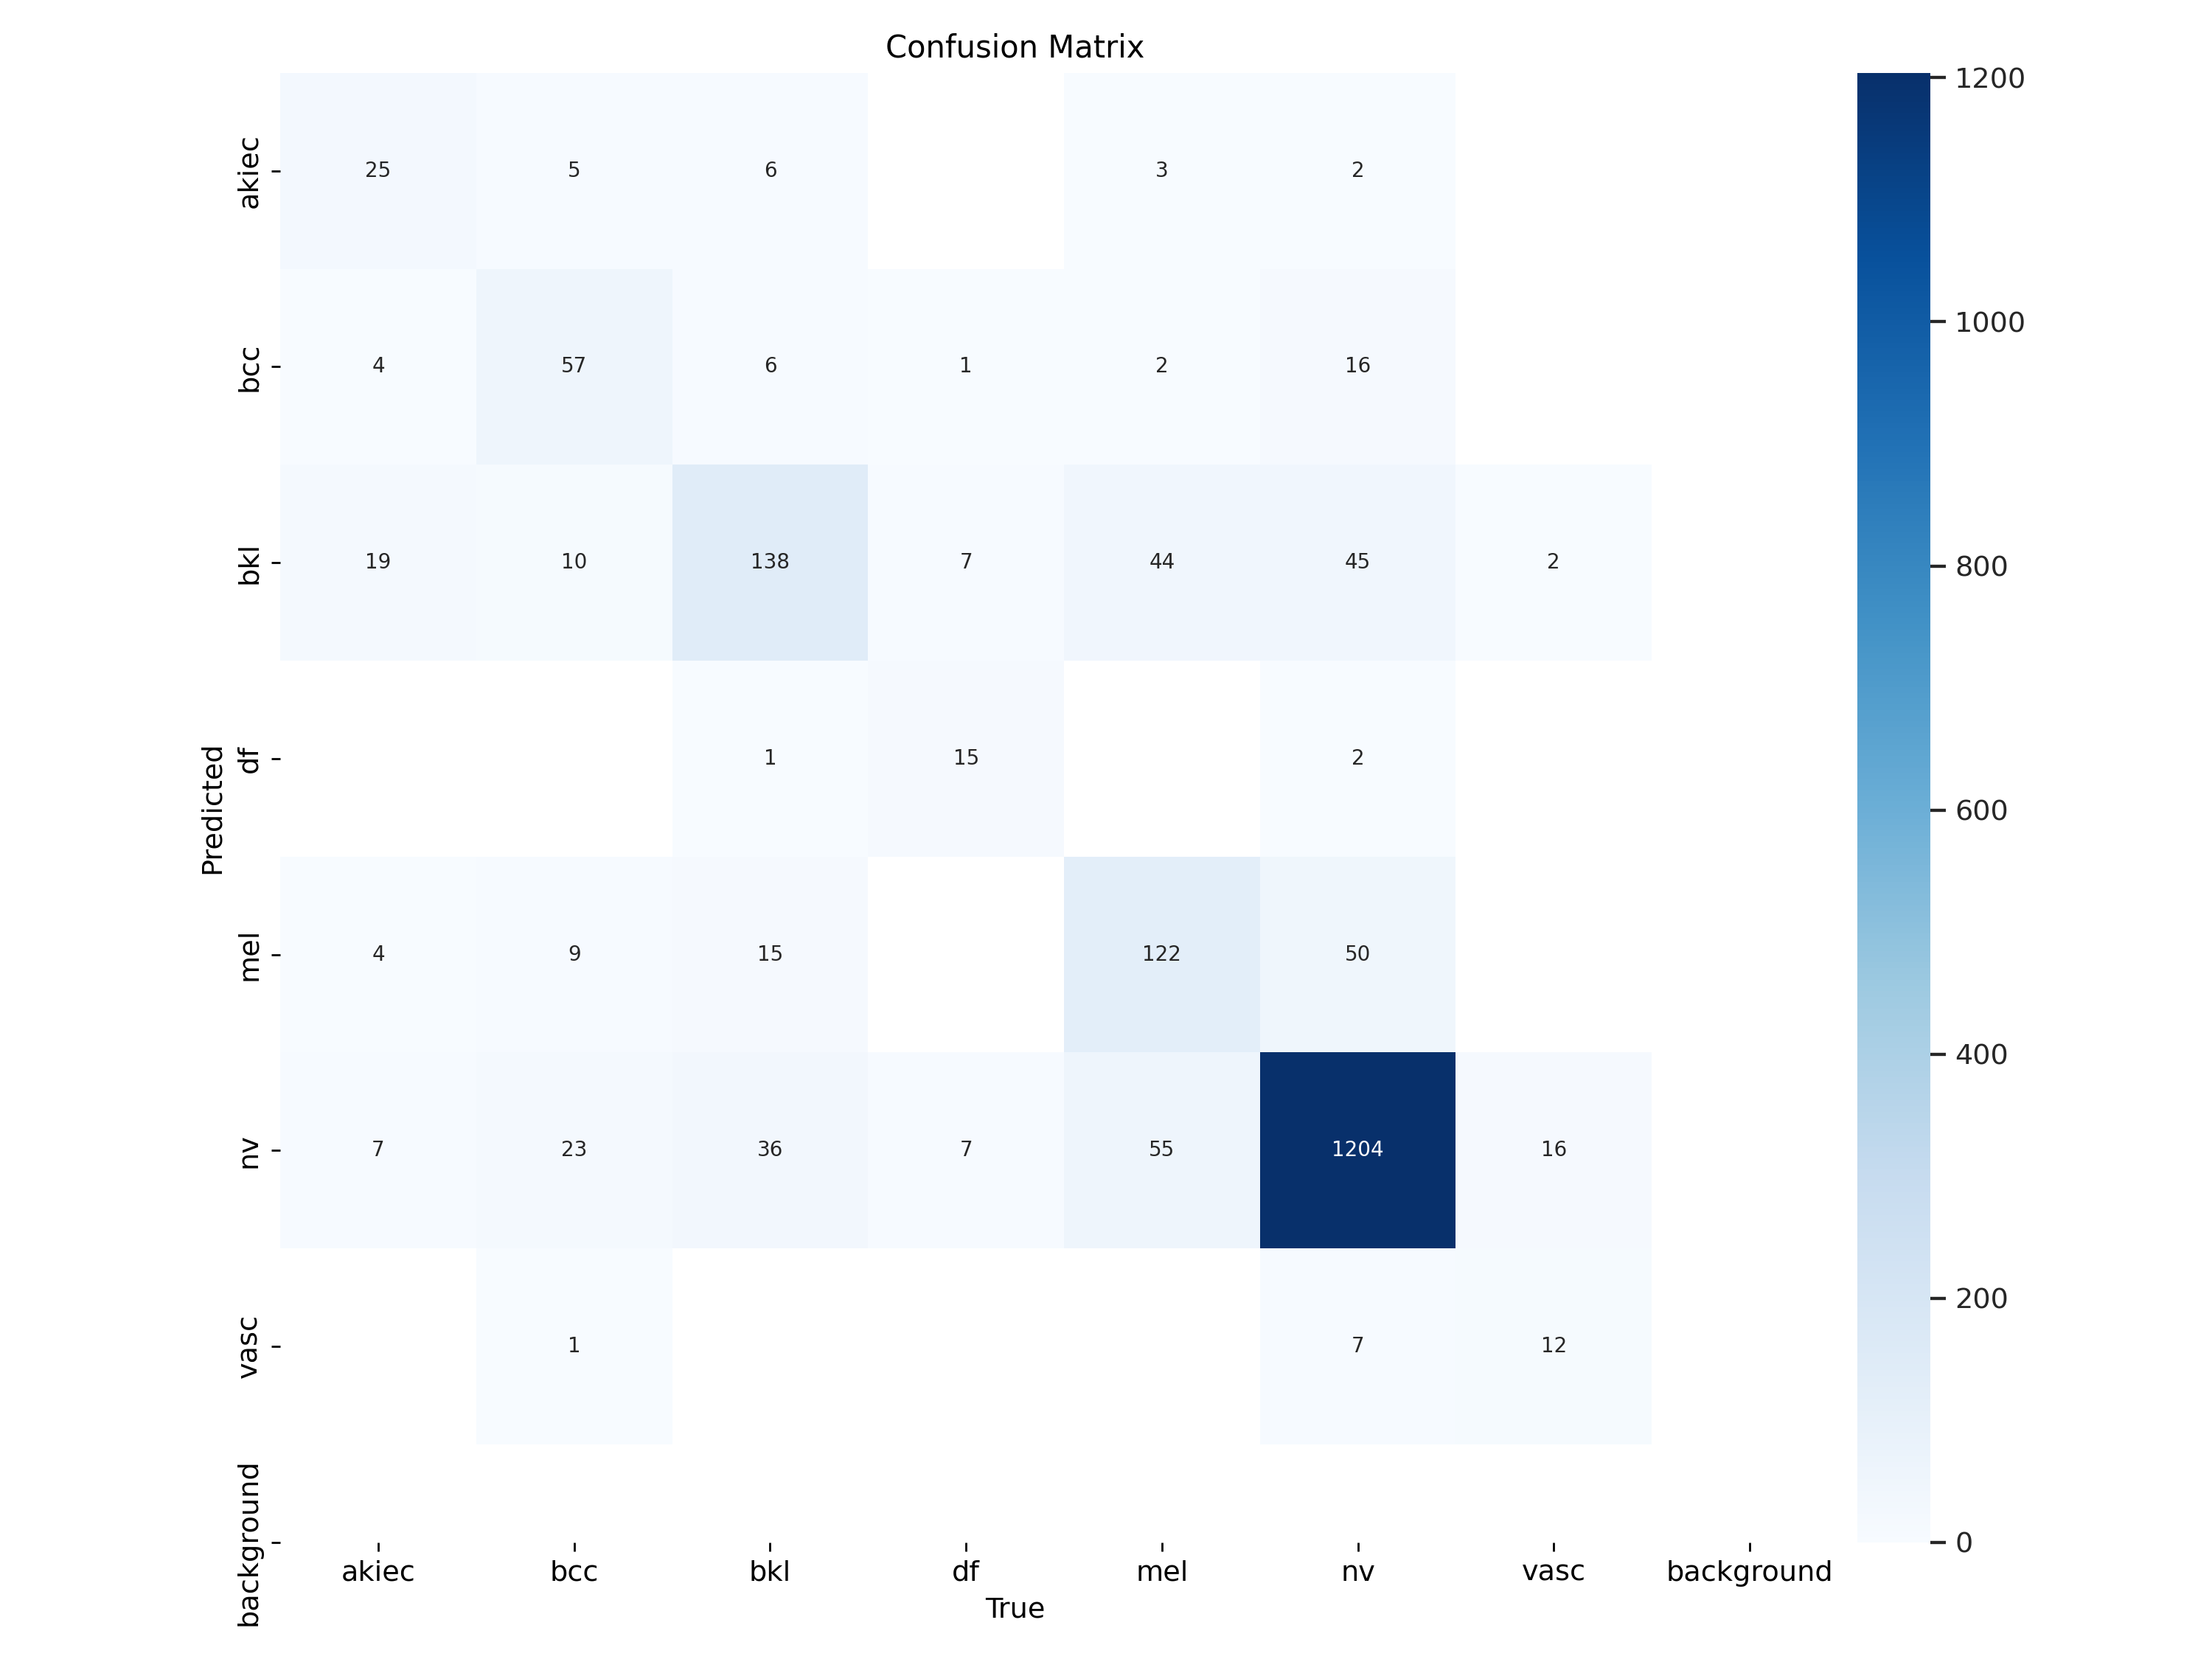

In [ ]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix.png')

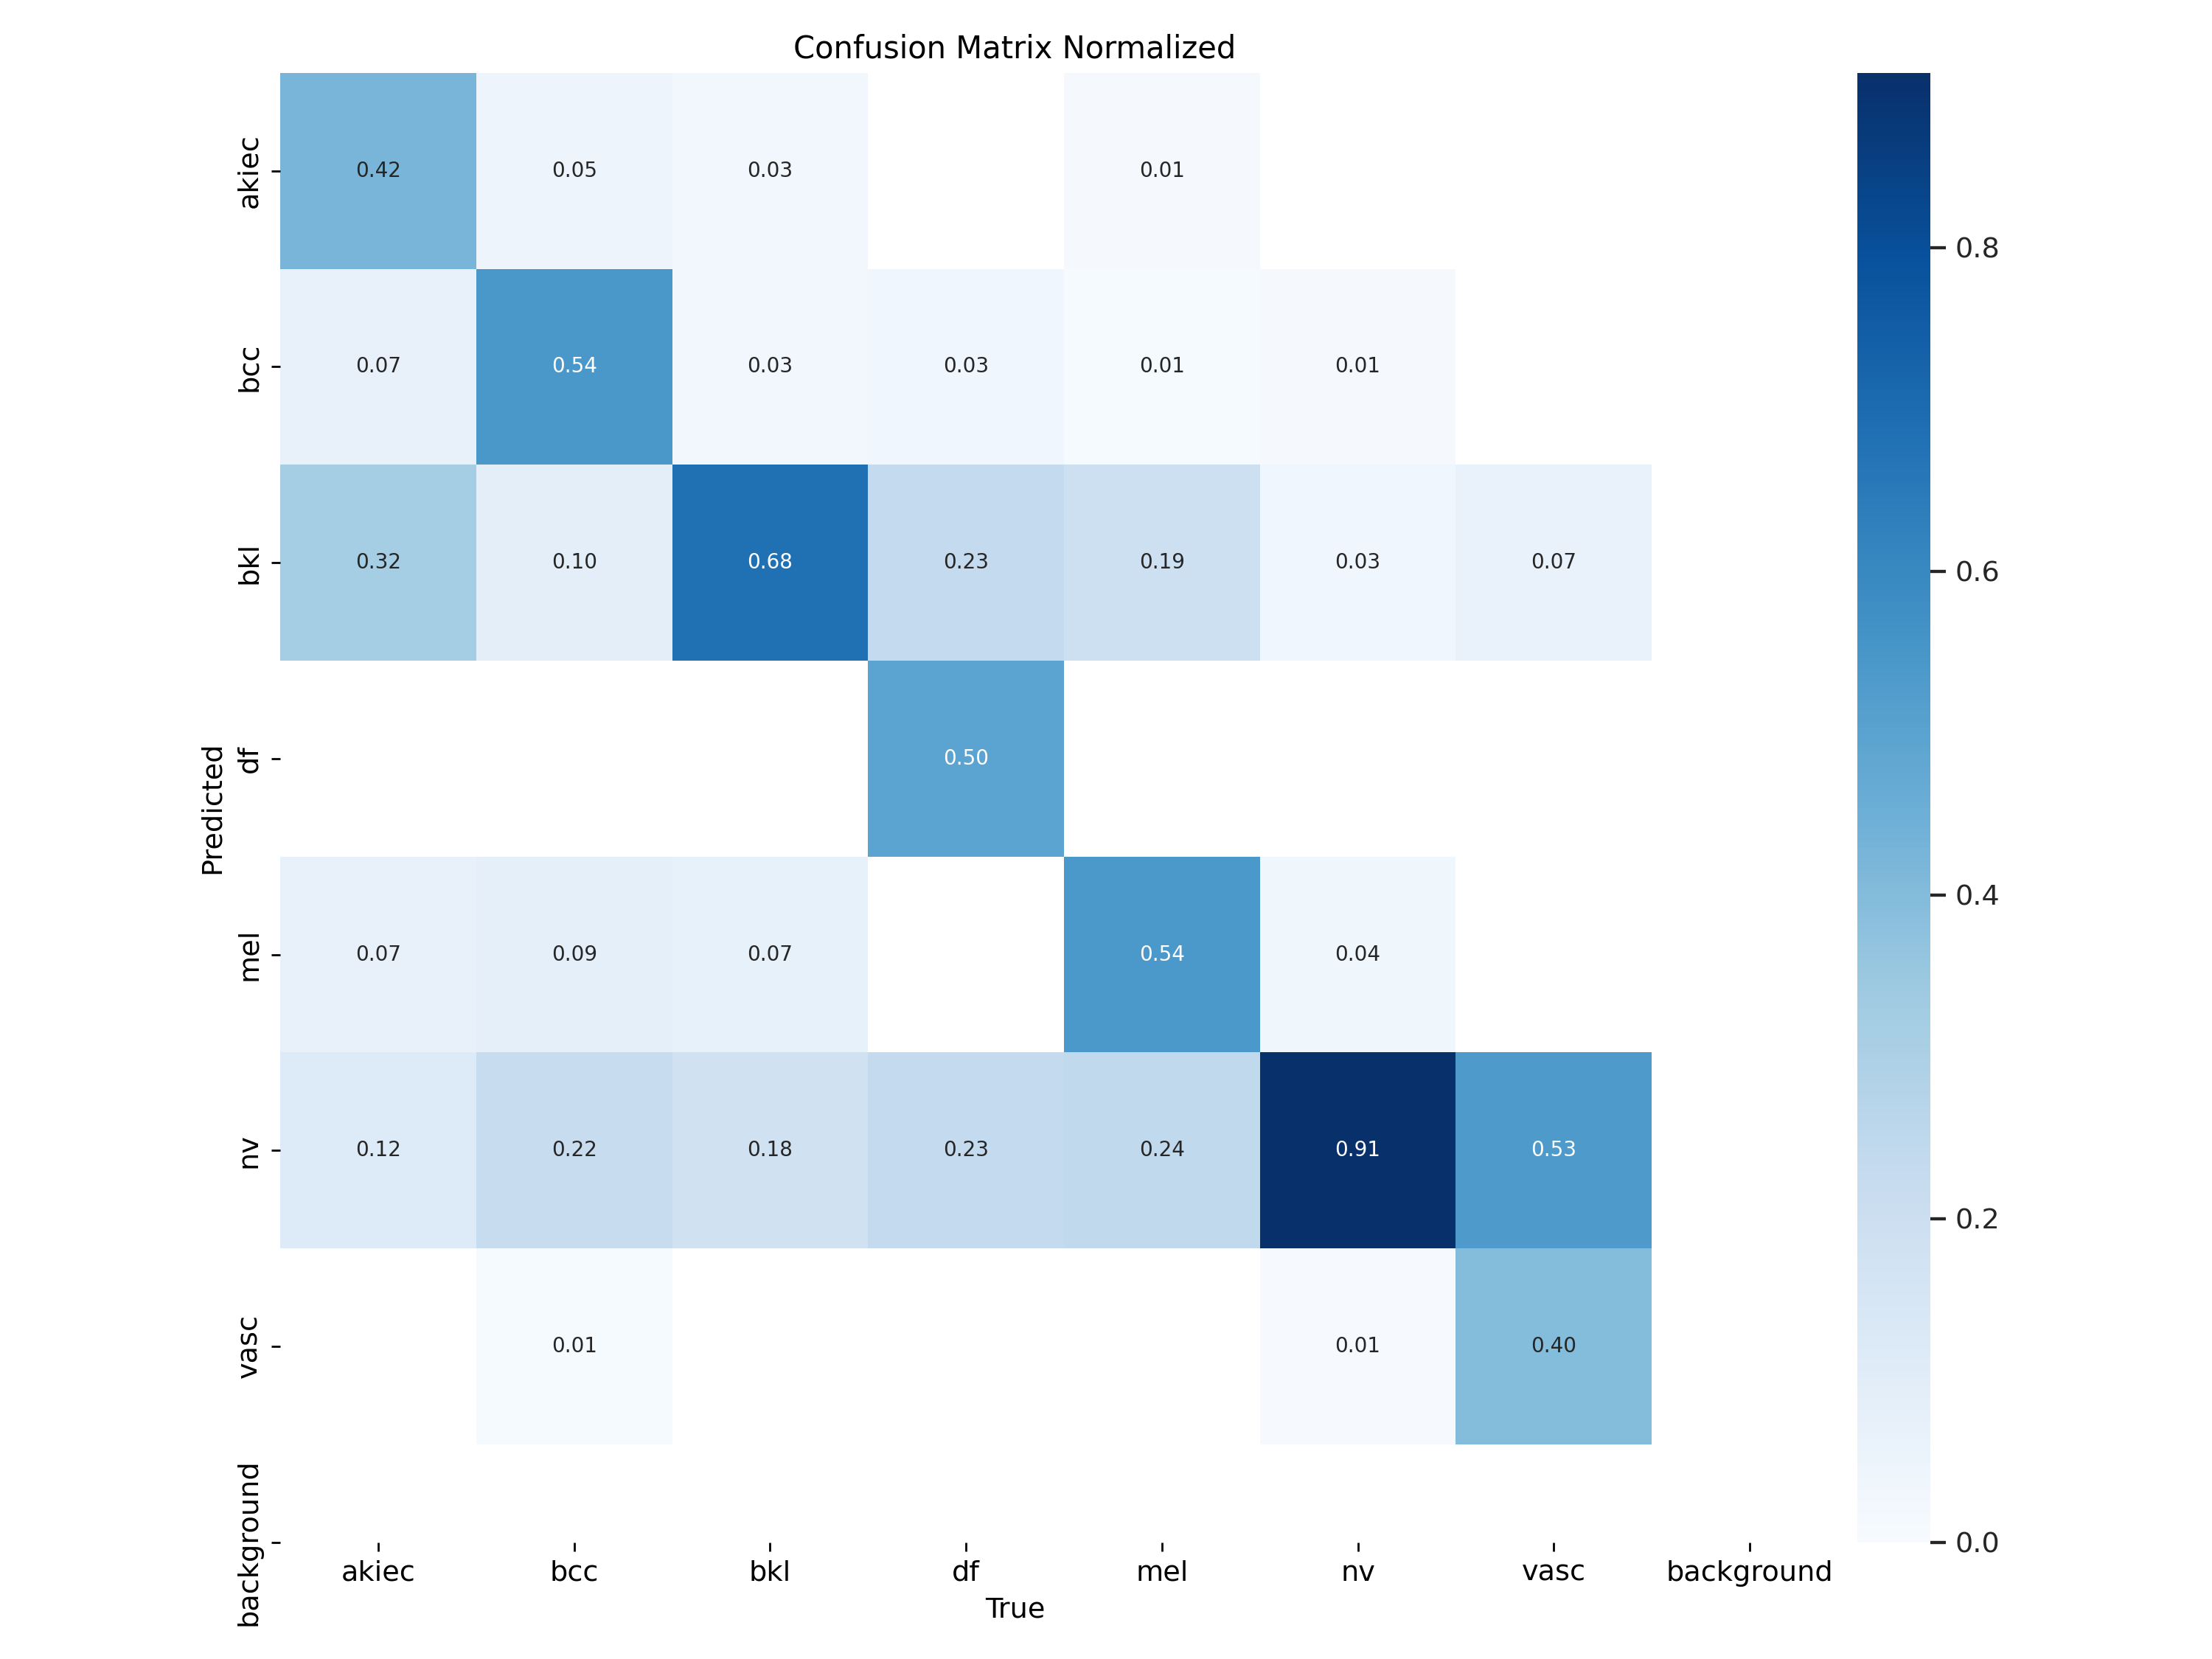

In [ ]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix_normalized.png')

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train2/weights/best.pt conf=0.25 source="{DATA_DIR}/test/bcc"

/content
Ultralytics 8.3.122 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,771,623 parameters, 0 gradients, 41.6 GFLOPs

image 1/54 /content/Skin-Cancer-Detection-4/test/bcc/ISIC_0024461_jpg.rf.887262a00f74862fc2eb3540d38d88d0.jpg: 128x128 bcc 1.00, akiec 0.00, nv 0.00, vasc 0.00, bkl 0.00, 6.8ms
image 2/54 /content/Skin-Cancer-Detection-4/test/bcc/ISIC_0024590_jpg.rf.112bec77564c002fbd58b16d7621e691.jpg: 128x128 nv 0.59, bcc 0.40, bkl 0.01, akiec 0.00, mel 0.00, 5.6ms
image 3/54 /content/Skin-Cancer-Detection-4/test/bcc/ISIC_0024833_jpg.rf.1762c9a5a666daf42948df40f09d7821.jpg: 128x128 bcc 0.97, akiec 0.02, nv 0.01, bkl 0.00, df 0.00, 5.3ms
image 4/54 /content/Skin-Cancer-Detection-4/test/bcc/ISIC_0025144_jpg.rf.4416c82d04cf86c503a54e7b4011f3ea.jpg: 128x128 bcc 0.52, mel 0.37, akiec 0.10, df 0.01, bkl 0.00, 5.3ms
image 5/54 /content/Skin-Cancer-Detection-4/test/bcc/ISIC_0025513_jpg.rf.026c051a94b6226df5692376f106bddf.jpg: 128x

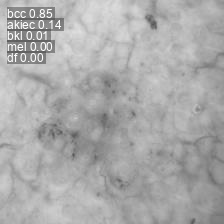

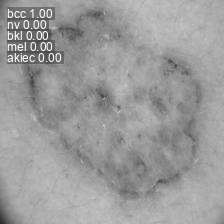

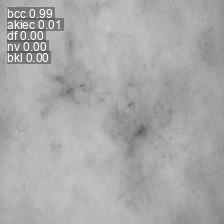

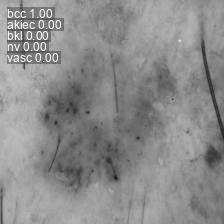

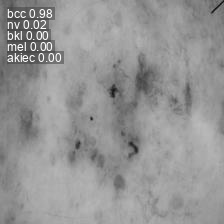

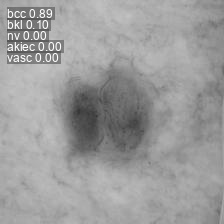

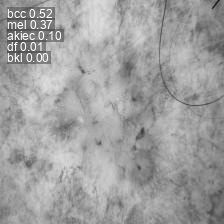

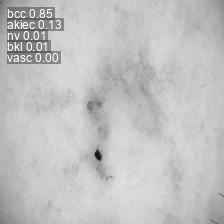

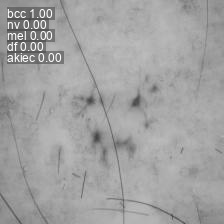

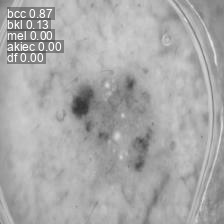

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Export Model

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
!yolo export model={HOME}/runs/classify/train/weights/best.pt format=onnx

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.30GHz)
YOLOv8m-cls summary (fused): 103 layers, 15808772 parameters, 0 gradients

PyTorch: starting from /content/runs/classify/train/weights/best.pt with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 36) (30.3 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 0.7s, saved as /content/runs/classify/train/weights/best.onnx (60.3 MB)

Export complete (2.4s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train/weights/best.onnx imgsz=128 
Validate:        yolo val task=classify model=/content/runs/classify/train/weights/best.onnx imgsz=128 data=/content/datasets 
Visualize:       https://netron.ap

### Download Model

In [ ]:
from google.colab import files
files.download('/content/runs/classify/train2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>